Implementation of the network described in

>   E. Kropff and A. Treves, "The emergence of grid cells: intelligent design or just adaption?" 
    Hippocampus (2008), 1256-69

Notation has mostly been adapted from the paper. However, 
I changed the input notation from an $r$ to an $x$, and
the hidden activations from $r_{(in)act}$ to $h_{(in)act}$.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append("../src")
from random_walk import smooth_walk
%load_ext autoreload
%autoreload 2


def display_W(W):

    n = W.shape[0]
    m = W.shape[1]
    n_ = int(np.sqrt(n))
    w =  int(np.sqrt(m))
    n_0 = 0
    img = np.concatenate([
        np.concatenate([   W[j*n_ + i].reshape((w,w))    for i in range(n_0, n_) ])
        for j in range(n_0, n_)], axis=1)
    
    return img


def get_smooth_inputs(d, w=50, r=3, speed=0.01, smootheness=0.3):
    Z = smooth_walk(num=d, speed=speed, smoothness=smootheness)
    X = np.zeros((w,w,d))
    
    for t in range(d):
        if t%5000 == 0:
            print t
        z = Z[:,t]
        
        for x in range(w):
            for y in range(w):
                xw = x/(w - 1.)
                yw = y/(w - 1.)
                
                dist2 = np.sum( (np.array([xw,yw]) - z)**2 )
                X[x,y,t] = np.exp( - dist2/0.01)
        X[:,:,t] /= np.max(X[:,:,t])
    X = X.reshape((w**2,-1))
    return X, Z


w  = 15
rr = 3

print w**2

d = 500000
X, Z = get_smooth_inputs(d,w,r=rr, speed=0.01, smootheness=0.3)
img = np.sum( X[:,:1], axis=1)
img = img.reshape((w,w))
plt.imshow(img)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
225


KeyboardInterrupt: 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0
(9.6595585880265844e-05, 0.99999079896285126)


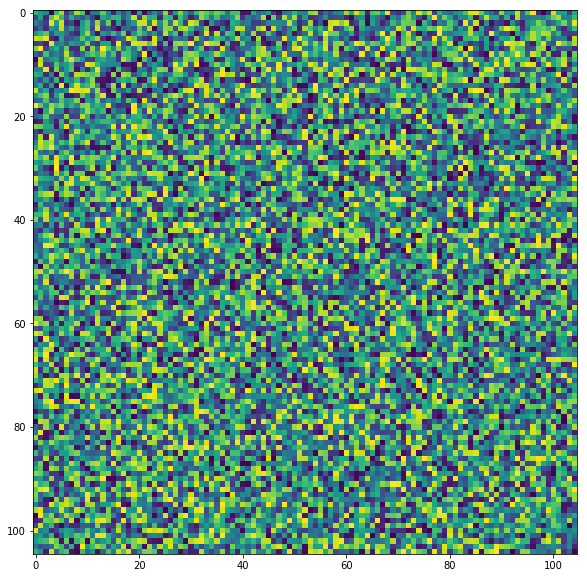

10000
(-0.0248718699299505, 1.0726577091683831)


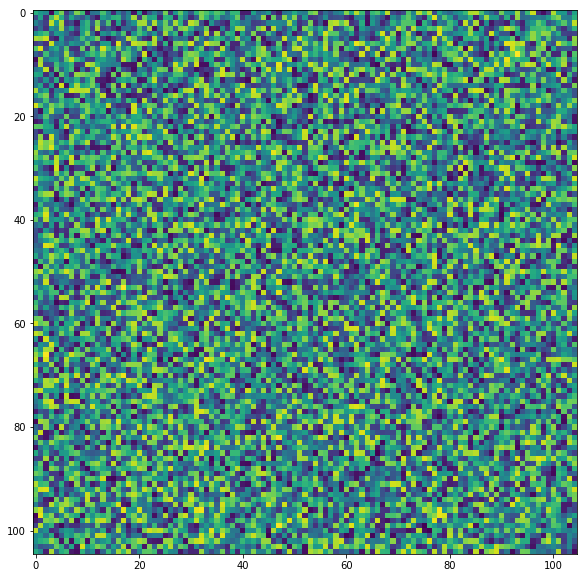

20000
(-0.052782073792535959, 1.0874911011865374)


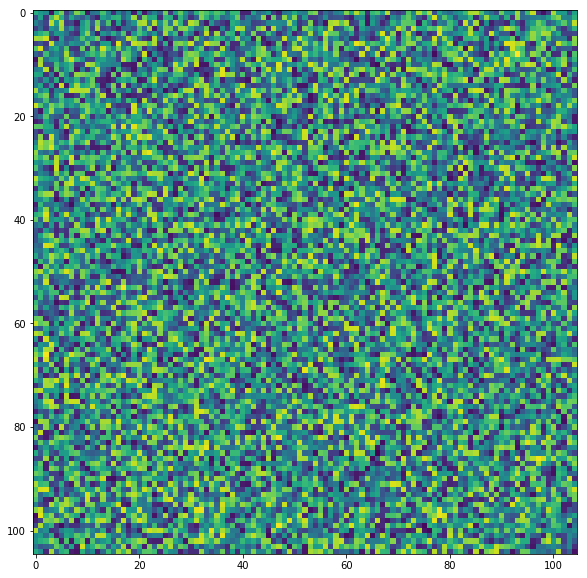

30000
(-0.079120289261441434, 1.1373732262604705)


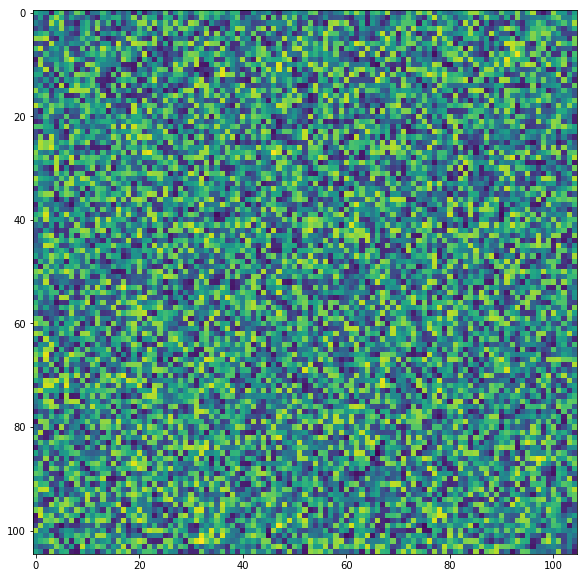

40000
(-0.08029410930370684, 1.2096221400952463)


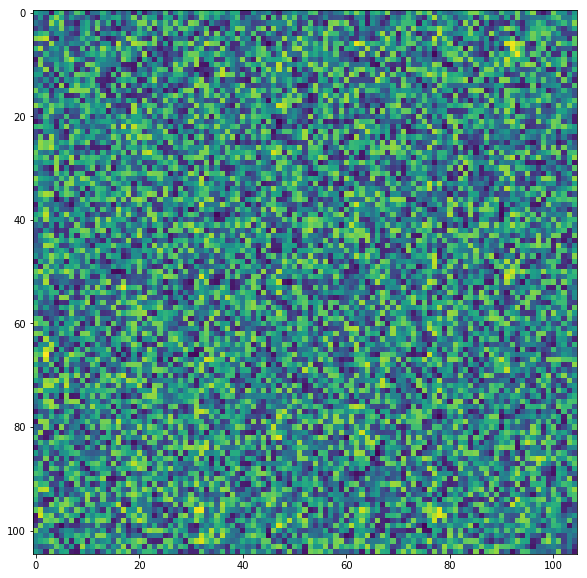

50000
(-0.094813050053120532, 1.2102168193776048)


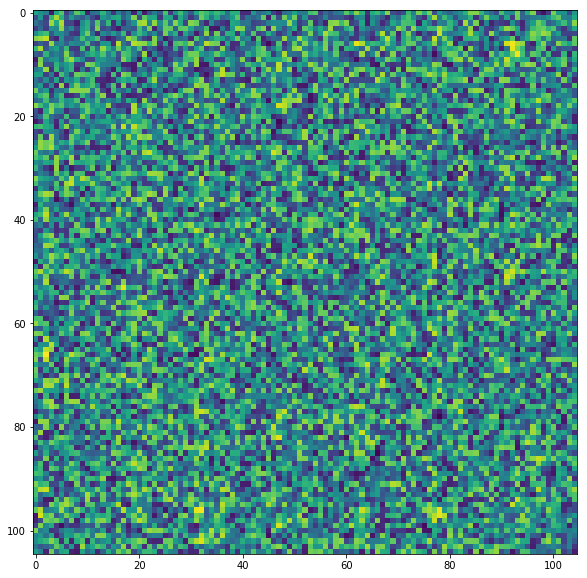

60000
(-0.11886737285856716, 1.2463553788734985)


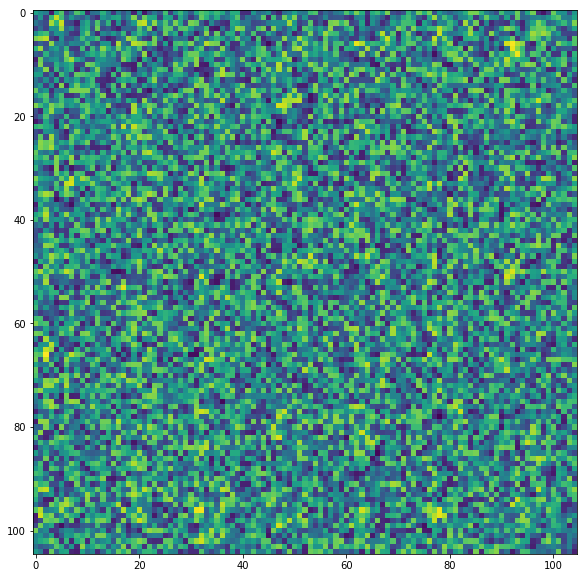

70000
(-0.12862076708697506, 1.2463618863088297)


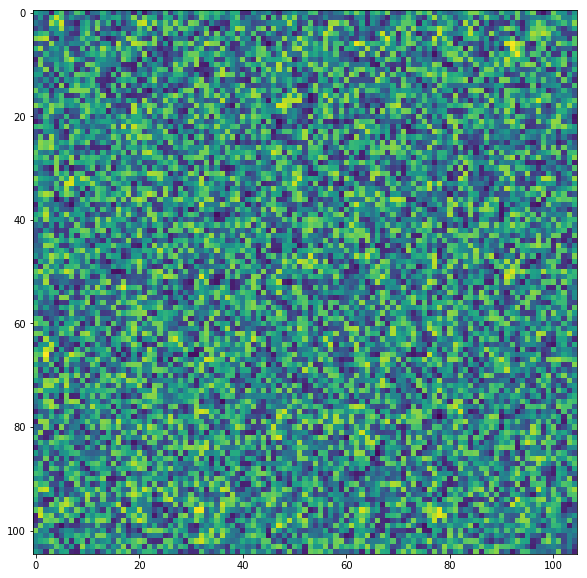

80000
(-0.1815524367819602, 1.2805521709500569)


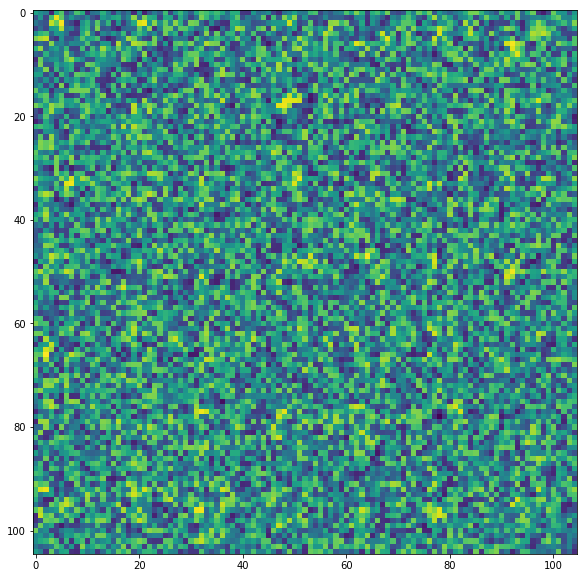

90000
(-0.18155241155466717, 1.2805521462730256)


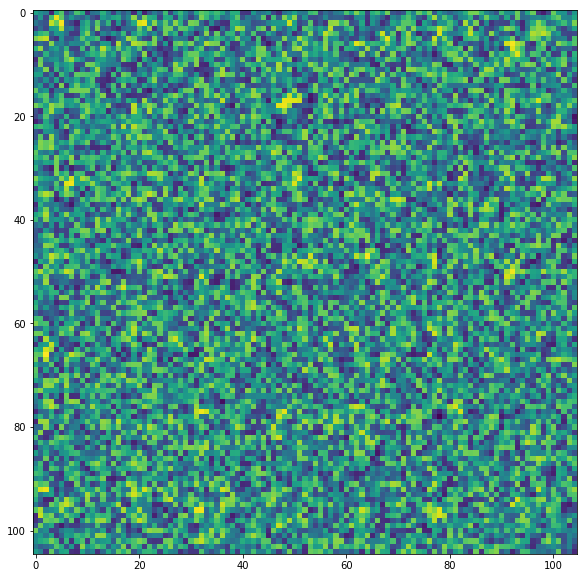

100000
(-0.18155205908830363, 1.2805503701167302)


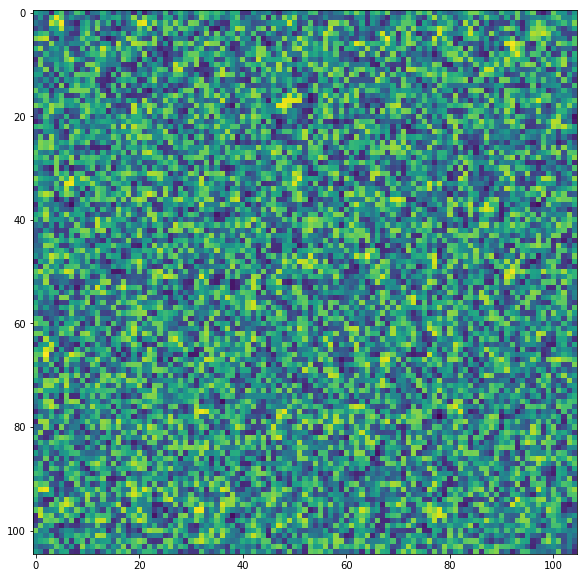

110000
(-0.22404322540978888, 1.408129551300437)


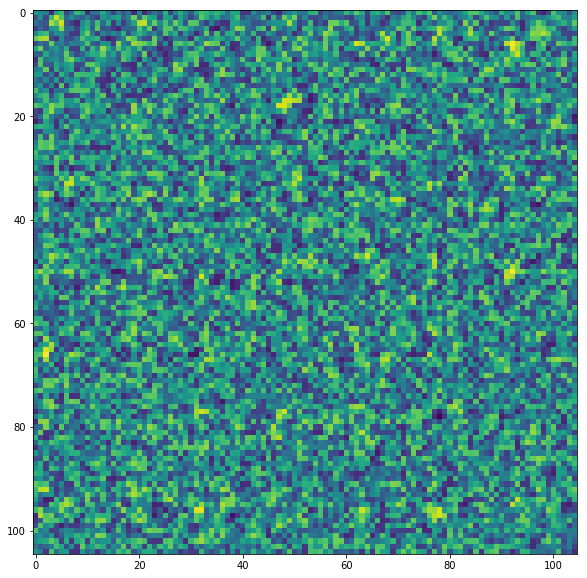

120000
(-0.22616306861970994, 1.4887508005433256)


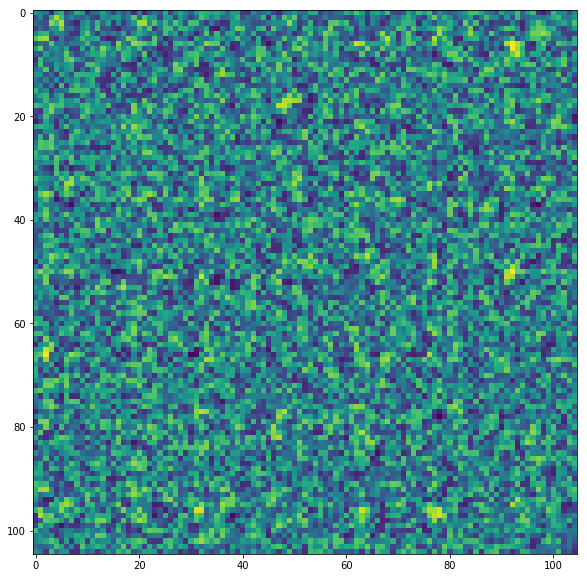

130000
(-0.22732203564150588, 1.5003337599055329)


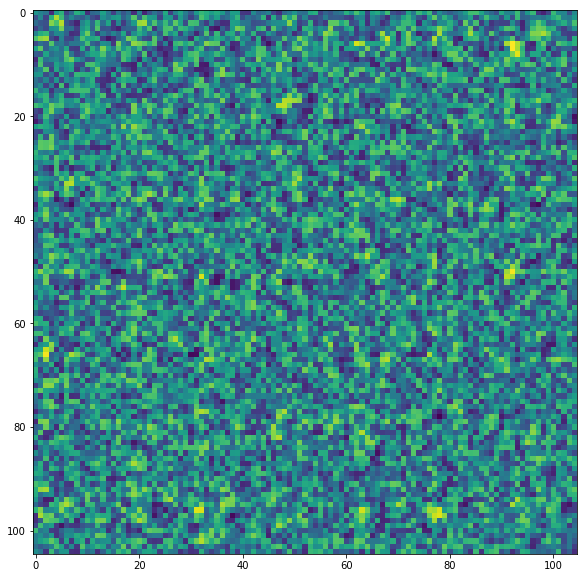

140000
(-0.26960611032473625, 1.6244153952000713)


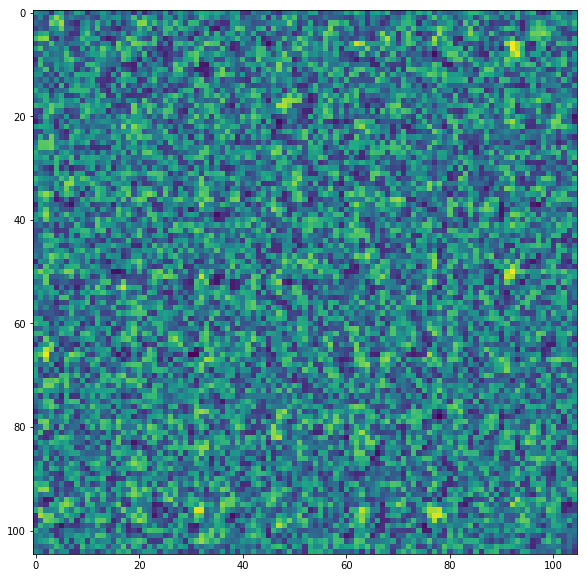

150000
(-0.27722919339050078, 1.6783171517507263)


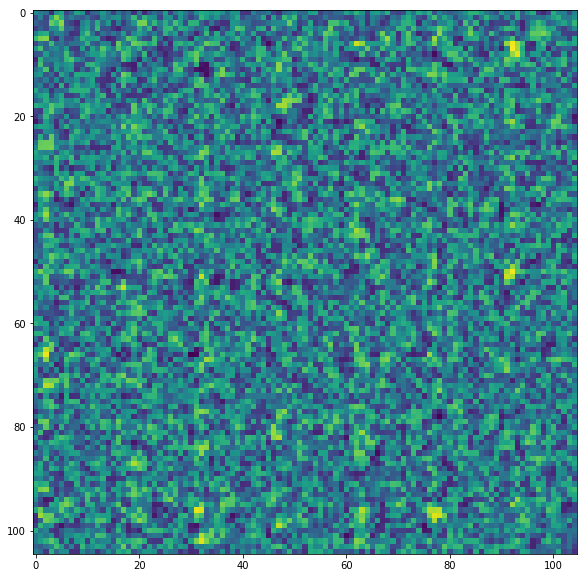

160000
(-0.38279035471491907, 1.8604209128140463)


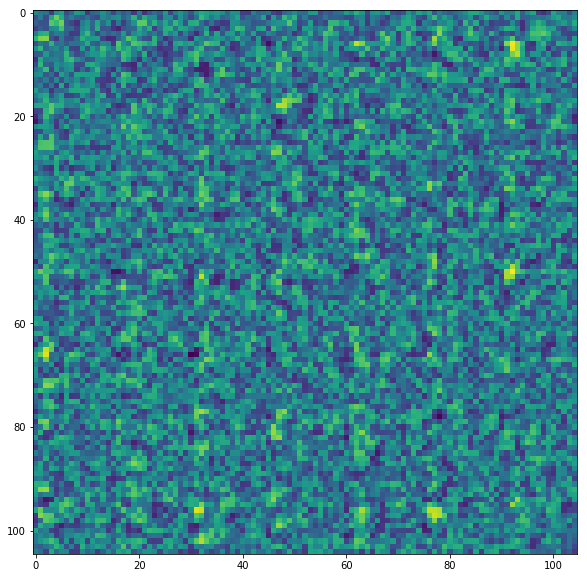

170000
(-0.38279033724311956, 1.8604547459950249)


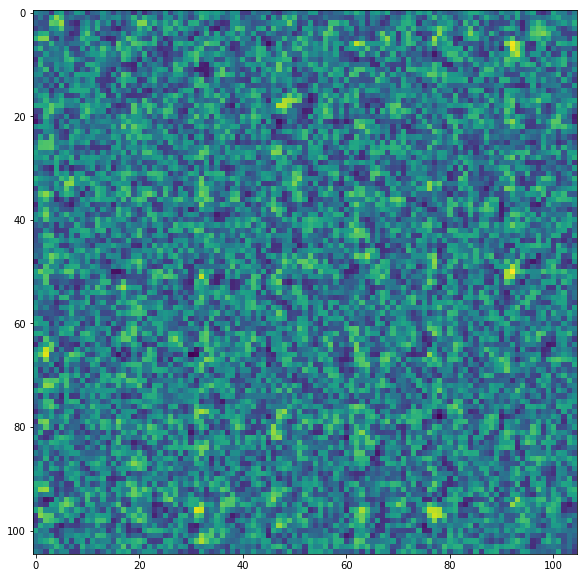

180000
(-0.42569457490616358, 1.8881005756140237)


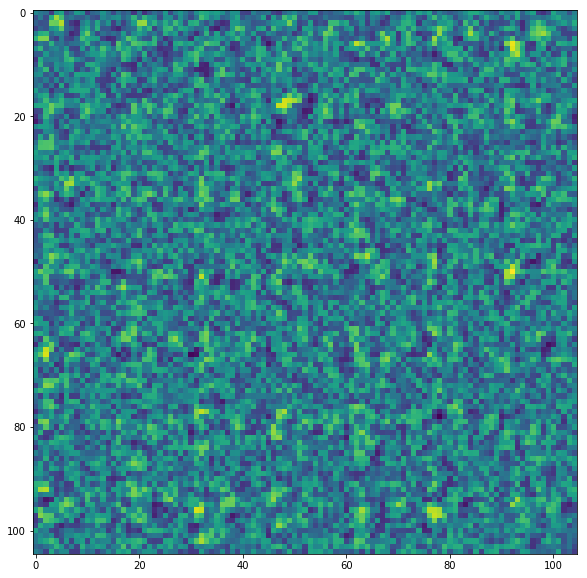

190000
(-0.42927070715127469, 1.8884108047336583)


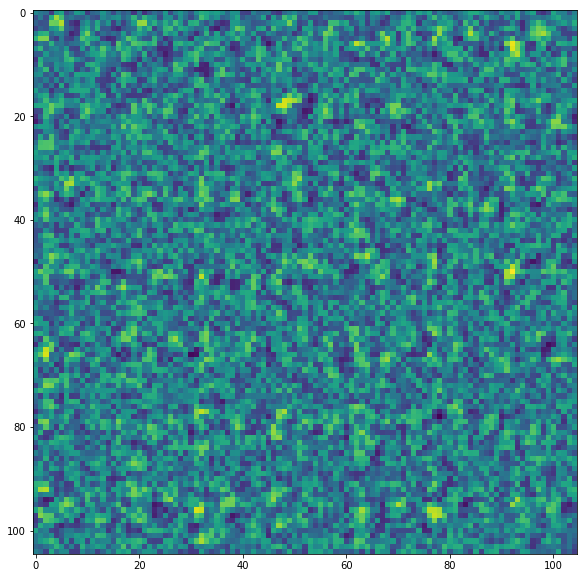

200000
(-0.42928522744547787, 1.8884110042619526)


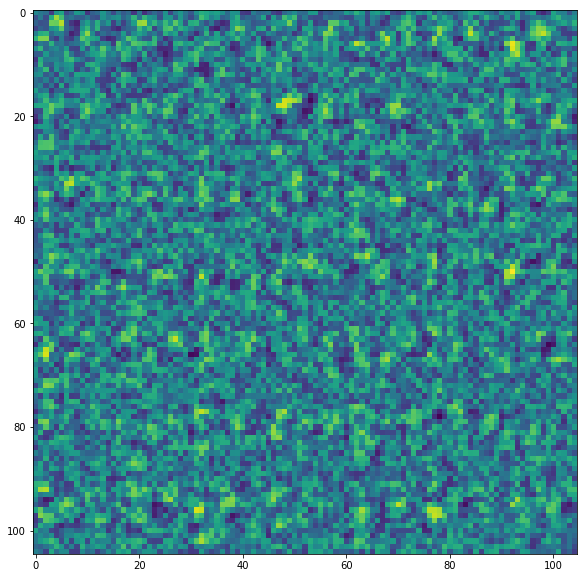

210000
(-0.50587306356641826, 2.0759381499422092)


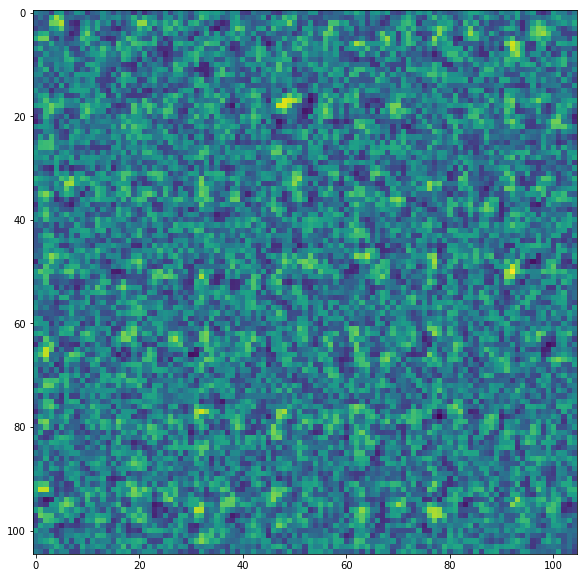

220000
(-0.60941730972359998, 2.1398057597579703)


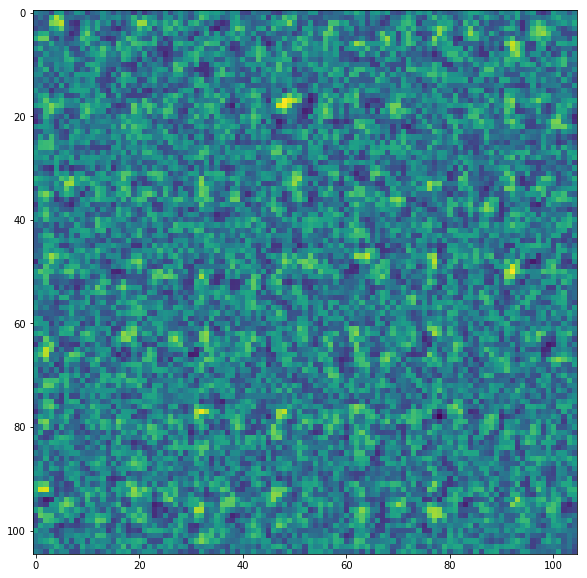

230000
(-0.60941729802952704, 2.139805759004227)


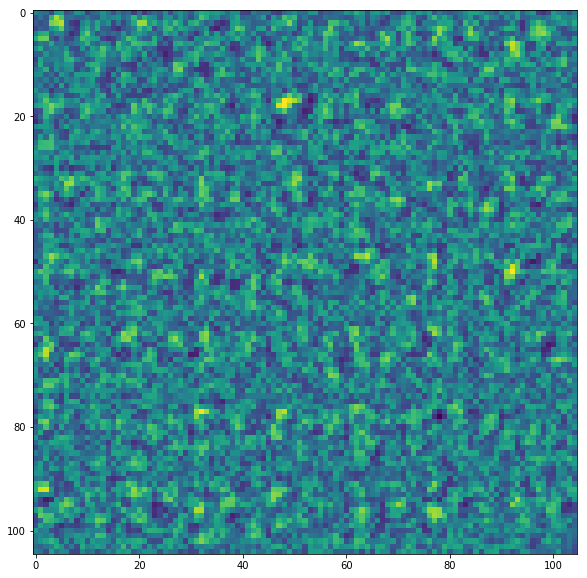

240000
(-0.64948224183835301, 2.1931377418820723)


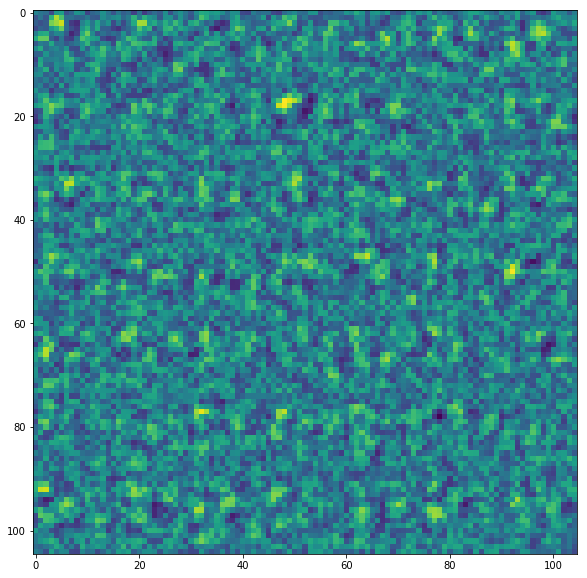

250000
(-0.64948047201450643, 2.1931366594302135)


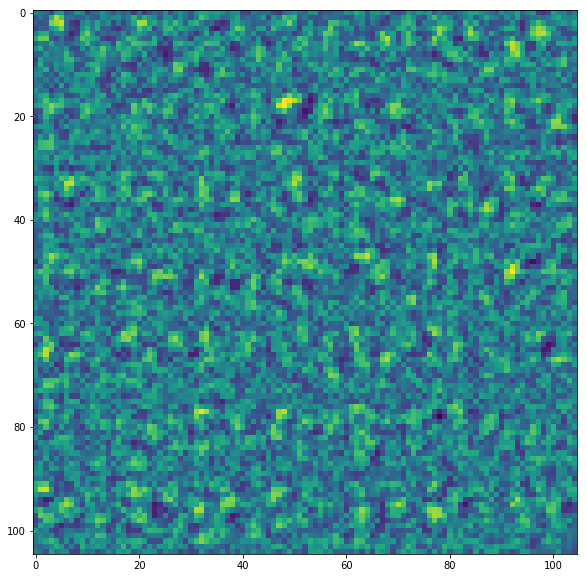

260000
(-0.74351488524290588, 2.3813363094527999)


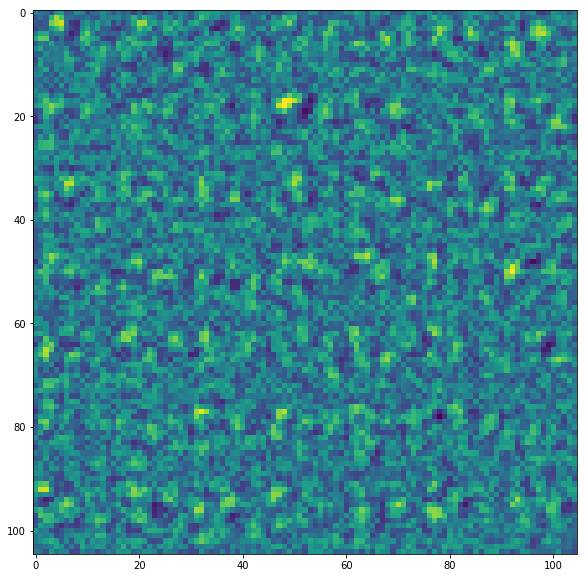

270000
(-0.76908845121496439, 2.4028979050384884)


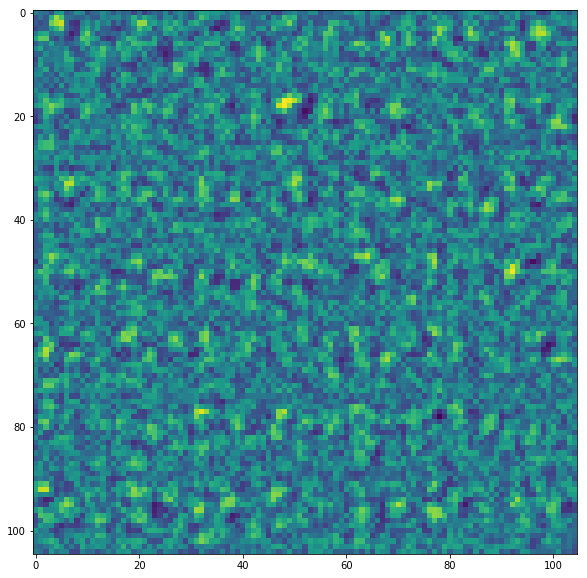

280000
(-0.80599146797631971, 2.4997643087348029)


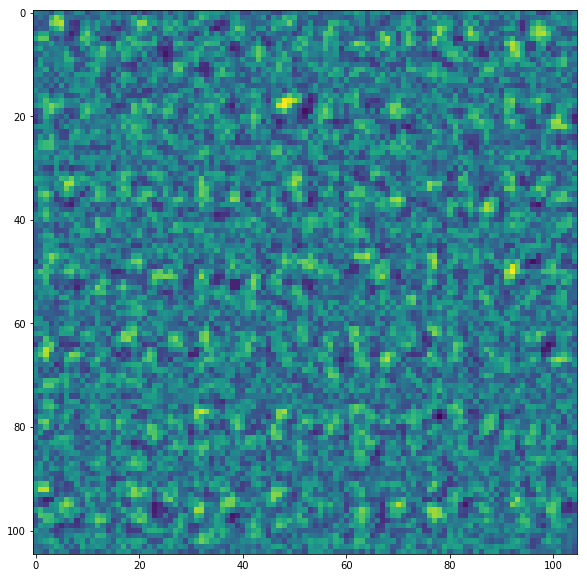

290000
(-0.95415465628130014, 2.8471651229904045)


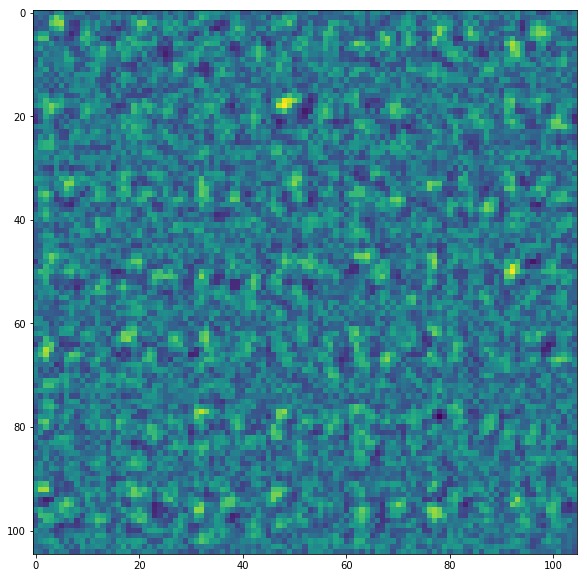

300000
(-0.95415465628176976, 2.8471651229895363)


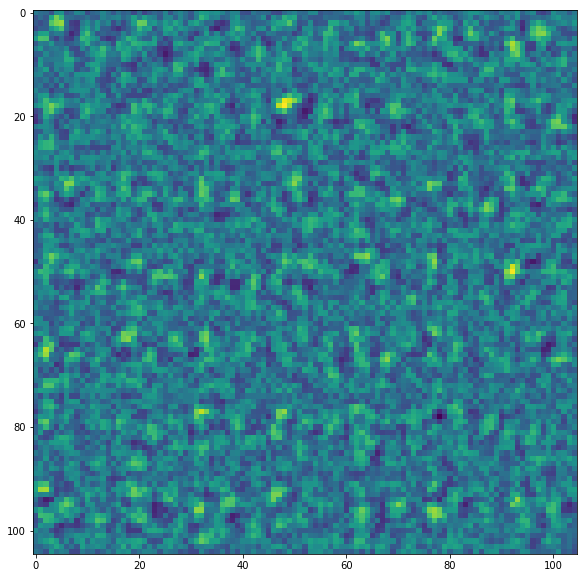

310000
(-0.9805917074662871, 2.9389942946572467)


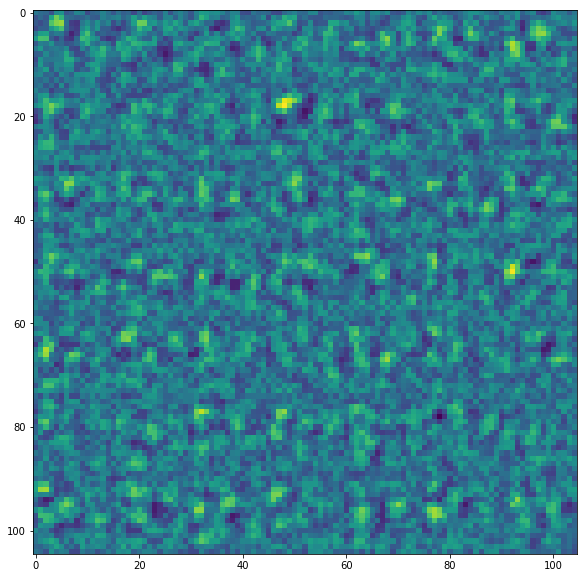

320000
(-0.98788433763001426, 3.2119153146354567)


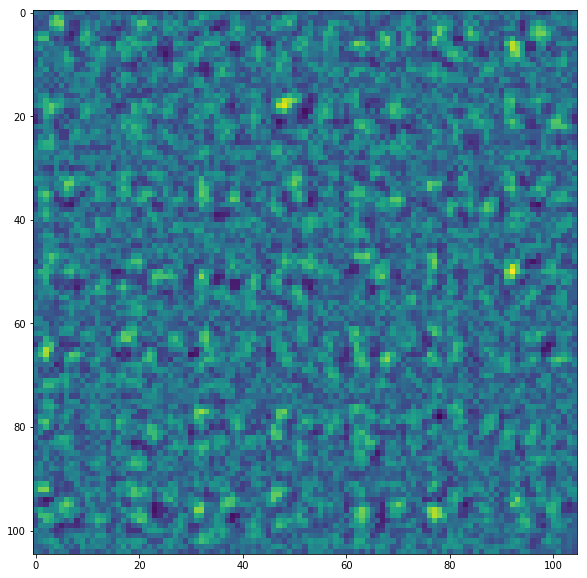

330000
(-1.1154821760750799, 3.668864815322511)


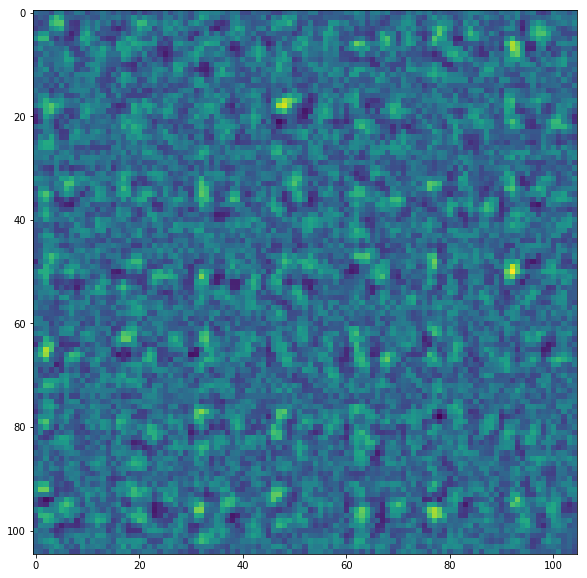

340000
(-1.1435582960006423, 3.7451422922267024)


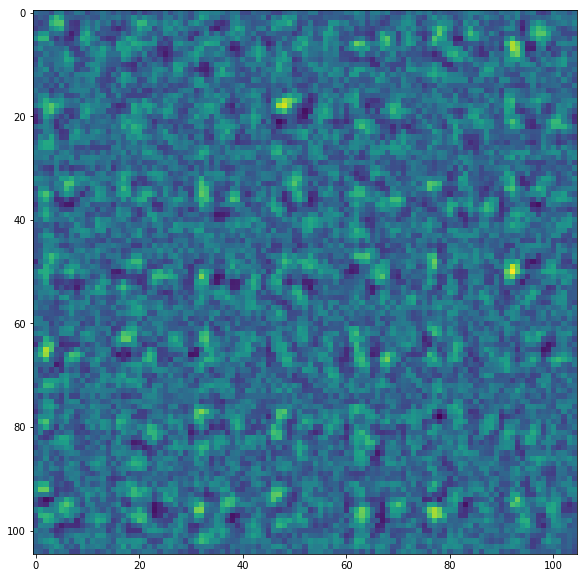

350000
(-1.1925514504361712, 3.870883278394778)


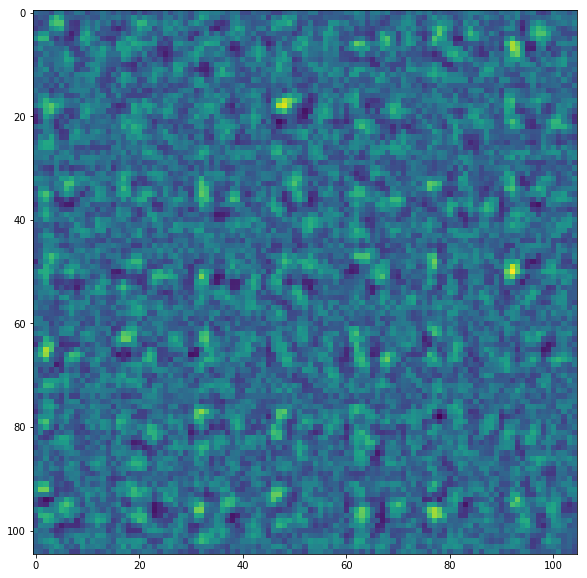

360000
(-1.202365086614857, 3.9936005879374581)


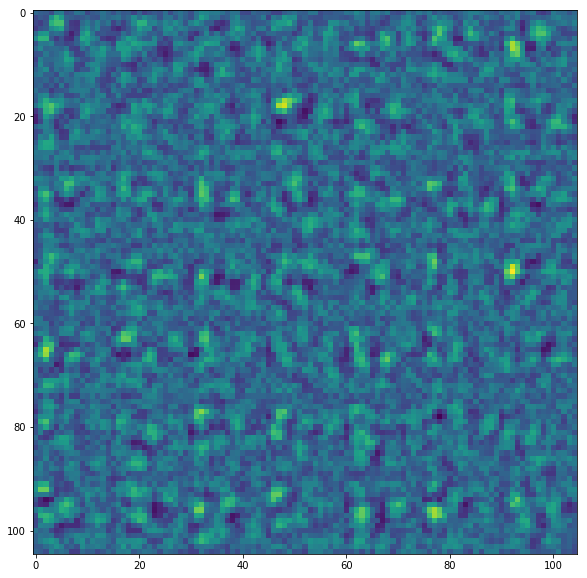

370000
(-1.3694178940884225, 4.5379175502478333)


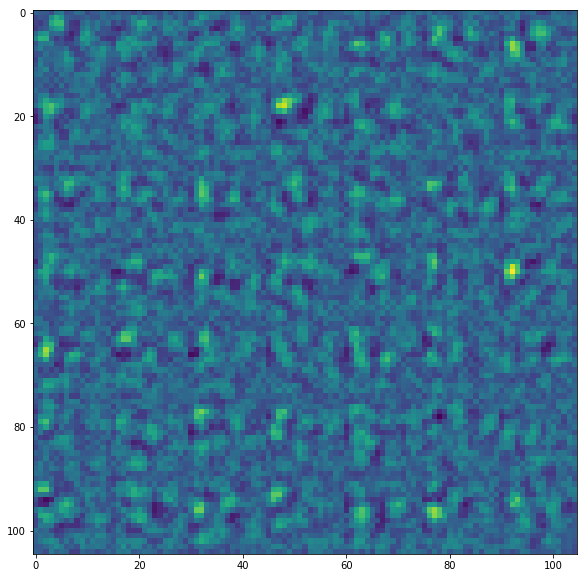

380000
(-1.5342538151080036, 5.0208929778295746)


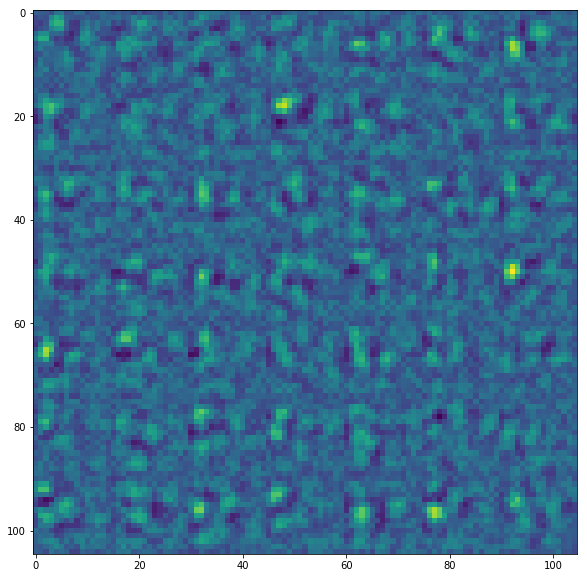

390000
(-1.5653890920328617, 5.0109237804423534)


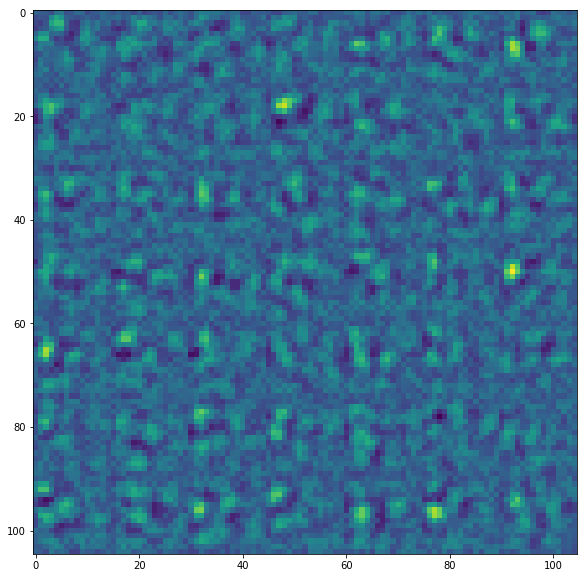

400000
(-1.5653890920331868, 5.010923780464541)


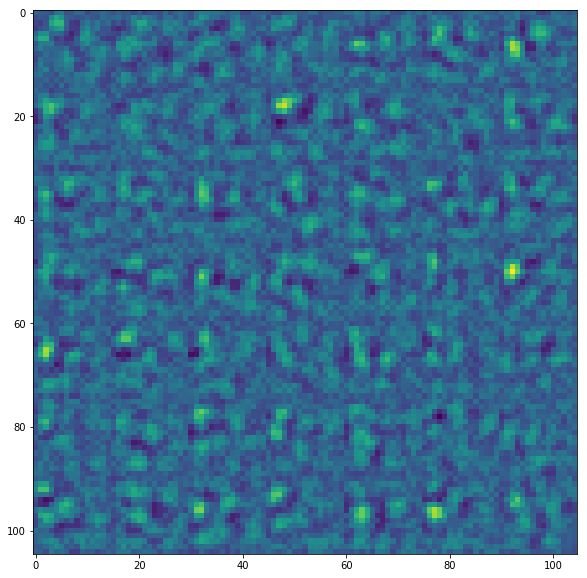

410000
(-1.6050333805902131, 5.2905266507685296)


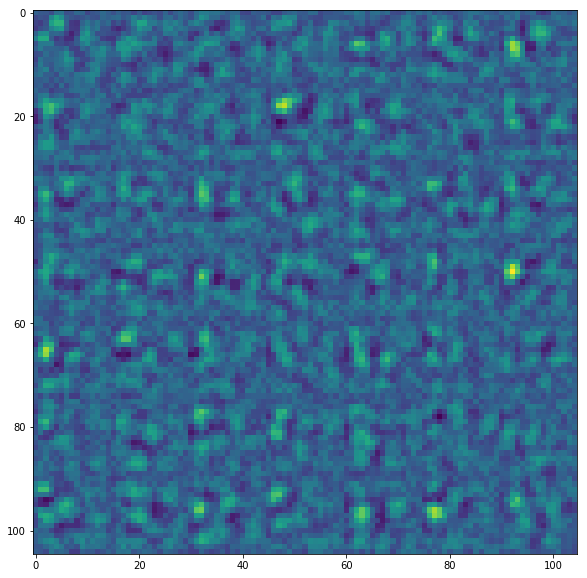

420000
(-1.619225941706935, 5.3918712001789224)


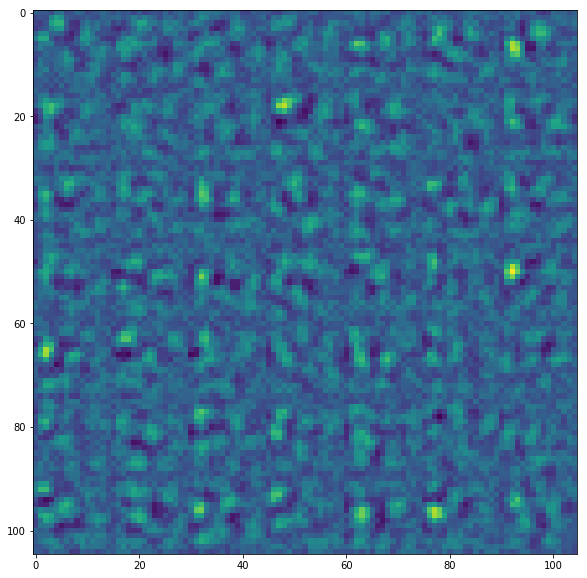

430000
(-1.6192255156448911, 5.3919083496201052)


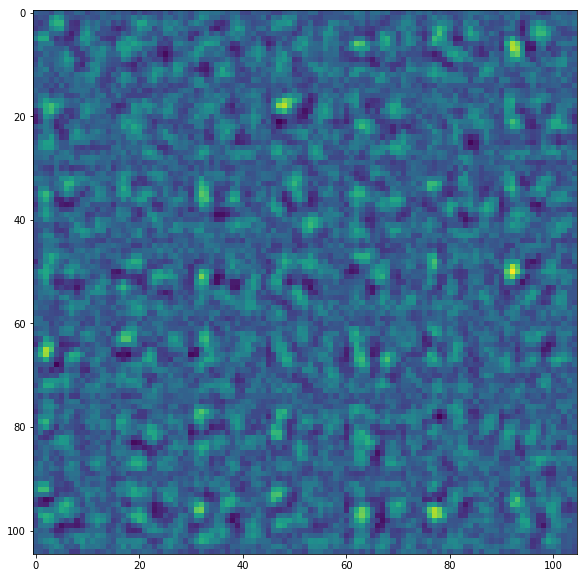

440000
(-1.6330324651220307, 5.409816469297092)


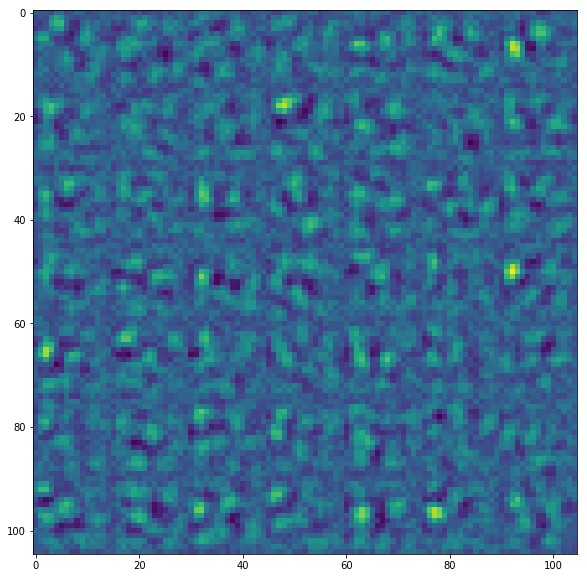

450000
(-1.7082155584436109, 5.7882916244050753)


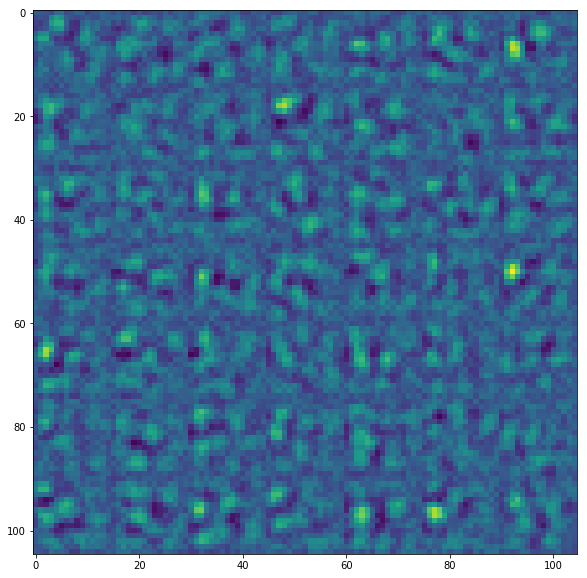

460000
(-1.8912783335253343, 6.1086741176854682)


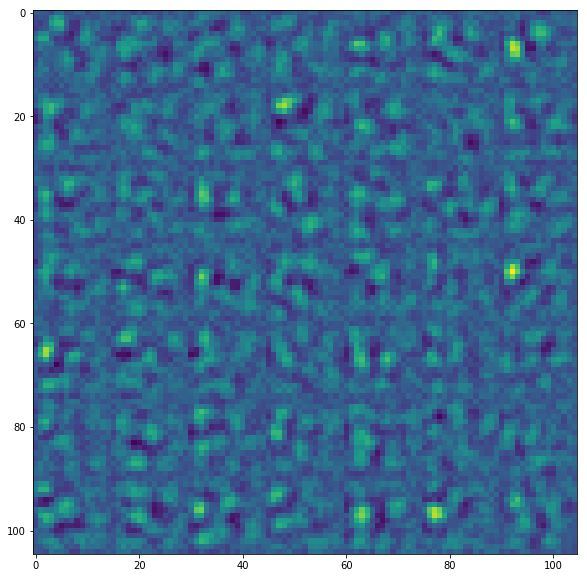

470000
(-2.0528339915314993, 6.3369981851790245)


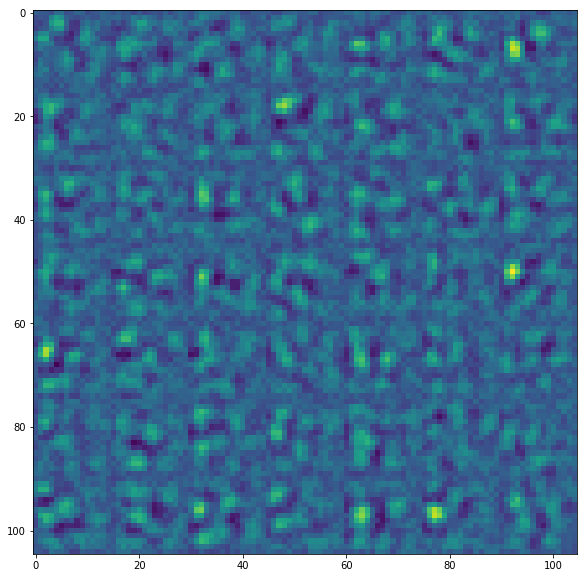

480000
(-2.0529995338982587, 6.3369981842876655)


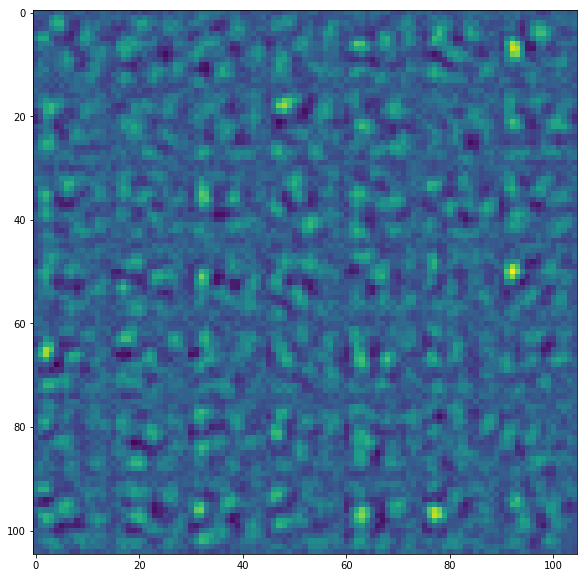

490000
(-2.1184852445315809, 7.0792476736132715)


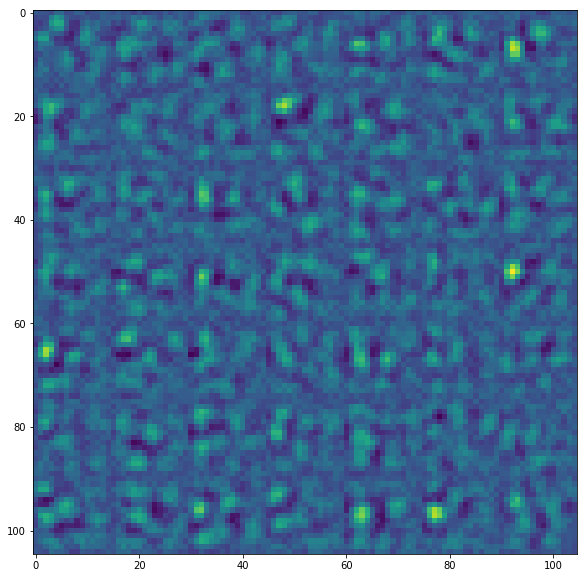

In [17]:
np.seterr(all='warn')
from kropff_and_treves import (compute_output,  
                               clip_parameters, 
                               update_parameters, 
                               create_parameters)
from scipy.special import expit

%load_ext autoreload
%autoreload 2


m = w**2
n = 50

parameters = create_parameters(num_in=m, num_out=n)

d = 500000
Y = np.zeros((n,d))
imgs = []
for t in range(d):
    J = parameters["J"]
    if t%10000 == 0:
        print t
        print(np.amin(J), np.amax(J))
        img = display_W(J)
        plt.figure(figsize=(10,10))
        plt.imshow(img)
        imgs.append(img.copy())
        plt.show()
        
    x = X[:,t] 
    y = Y[:,t] 
    
    compute_output(x, y, parameters)
    update_parameters(x, y, parameters)
    parameters["theta"] = 0.0
    parameters["g"]     = 1.0
#     clip_parameters(parameters)




In [18]:
print(np.amax(J))
print(np.amin(J))

7.74520909698
-2.36213823253


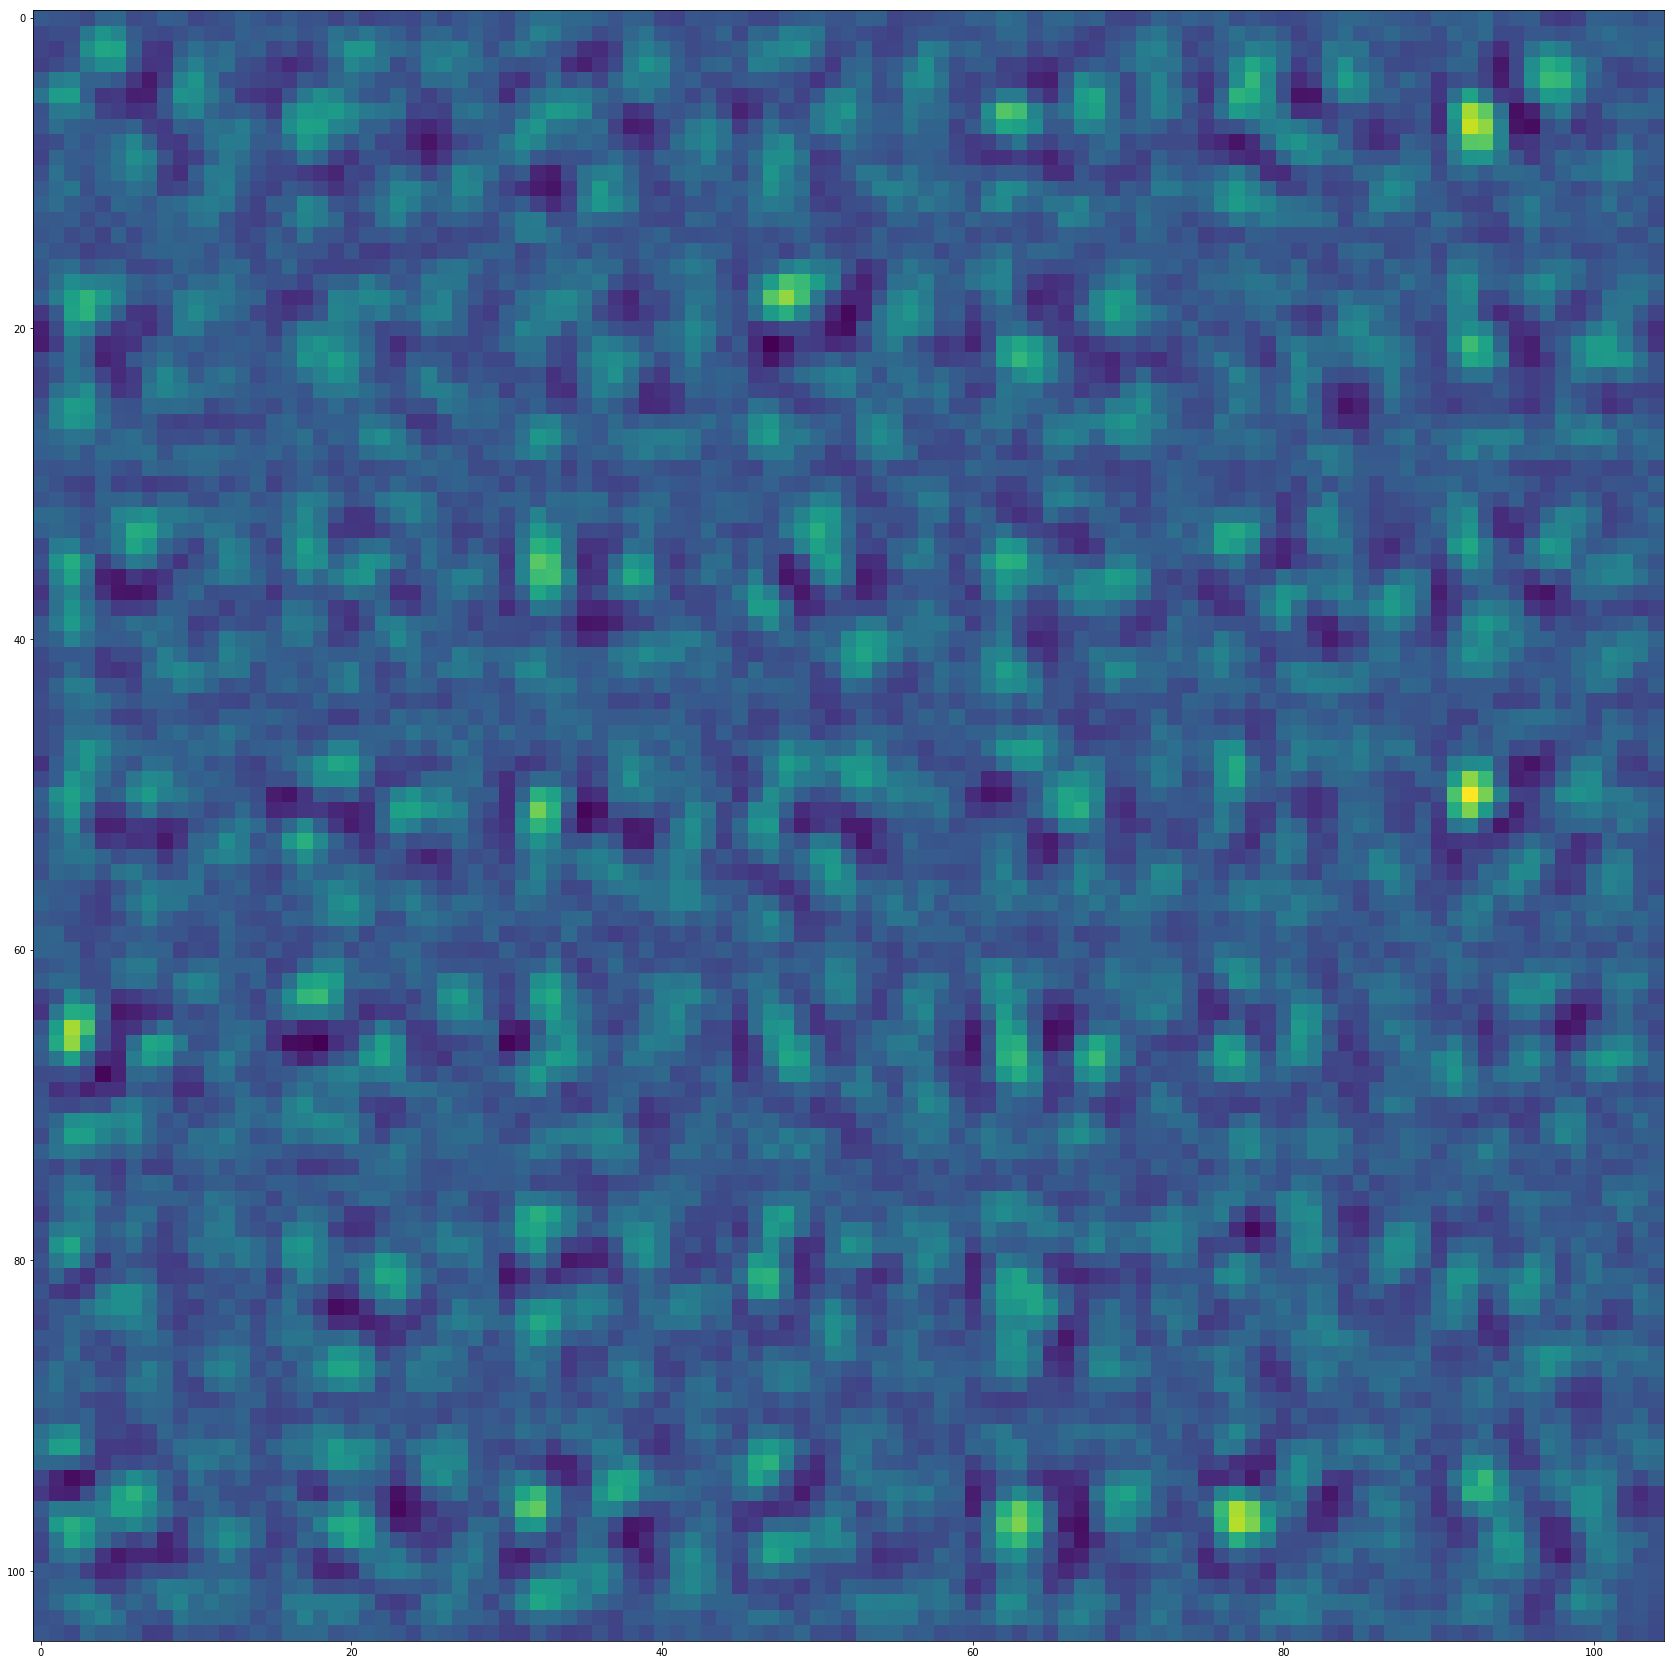

In [19]:



img = display_W(J)


plt.figure(figsize=(30,30))
plt.imshow(img)
plt.show()


[u'html']


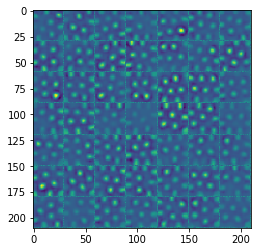

In [58]:
import matplotlib.animation as manimation


def create_movie(imgs, filename, title, fps=15, dpi=100):
    """Helps us to create a movie."""
    FFMpegWriter = manimation.writers['html']
    metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
    metadata     = dict(title=title)
    writer       = FFMpegWriter(fps=fps, metadata=metadata)
    fig = plt.figure()
    
    with writer.saving(fig, filename, dpi):
        for t in range(len(imgs)):
            plt.imshow(imgs[t])
            writer.grab_frame()

print manimation.writers.list()


            
create_movie(imgs, "test_normalized.html", "ttt")
            

(1, 4)
(3, 1)


array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])